# SNP Grid Data Using BigQuery
Using BigQuery to access large amount of SNP Grid data

In [2]:
library(bigrquery) # used for querying BigQuery
library(ggplot2) # used for visualization
library(dplyr) # used for data wrangling


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [1]:
# authorization
bq_auth(use_oob = True)

ERROR: Error in bq_auth(use_oob = True): could not find function "bq_auth"


In [3]:
# Set the project ID
PROJECT_ID <- "jax-cube-prd-ctrl-01"

In [4]:
sql_query <- "SELECT count(*) FROM `jax-cube-prd-ctrl-01.mouse_snp.chr6_flat`"
snp_data <- bq_table_download(
    bq_project_query(PROJECT_ID, query=sql_query)
)
snp_data

f0_
<int>
172452029


In [5]:
sql_query <- "SELECT * FROM `jax-cube-prd-ctrl-01.mouse_snp.chr6_flat` limit 50"
snp_data <- bq_table_download(
    bq_project_query(PROJECT_ID, query=sql_query)
)
head(snp_data, 5)

Warning message in as.integer.integer64(x):
“NAs produced by integer overflow”


chr,start_position,rs,strain_id,strain_name,imputed_flag,genotype,percent_imputed,percent_missing
<chr>,<int>,<list>,<int>,<chr>,<list>,<chr>,<dbl>,<dbl>
6,117415518,rs232600184,NA,SSL/LeJ:SSL/LeJ,1,A,5,93.4
6,117944740,rs585446078,NA,ILSXISS94/TejJ:ILSXISS94/TejJ,1,G,5,93.8
6,111027727,,NA,IHOT-2:IHOT-2,1,G,12,1.6
6,111027727,,NA,ILSXISS114/TejJ:ILSXISS114/TejJ,1,G,12,1.6
6,111487357,rs583810774,NA,NZW/LacJ:NZW/LacJ,0,NA,13,85.6


In [ ]:
str(snp_data)

In [ ]:
summary(snp_data)

In [6]:
sql_query <- "SELECT distinct strain_name, count(*) 
     FROM `jax-cube-prd-ctrl-01.mouse_snp.chr6_flat`
     WHERE percent_imputed < 50.0 and genotype = 'A' group by strain_name"
snp_data <- bq_table_download(
    bq_project_query(PROJECT_ID, query=sql_query)
)
snp_data

strain_name,f0_
<chr>,<int>
ISS/IbgTejJ:ISS/IbgTejJ,885
B6.A-Chr3:B6.A-Chr3,809
CHMU/LeJ:CHMU/LeJ,806
BXD71/RwwJ:BXD71/RwwJ,911
B6.A-Chr16:B6.A-Chr16,809
LG/J:LG/J,1030
MOLD/RkJ:MOLD/RkJ,1342
CC018/Unc:CC018/Unc,1093
B6.A-Chr15:B6.A-Chr15,809


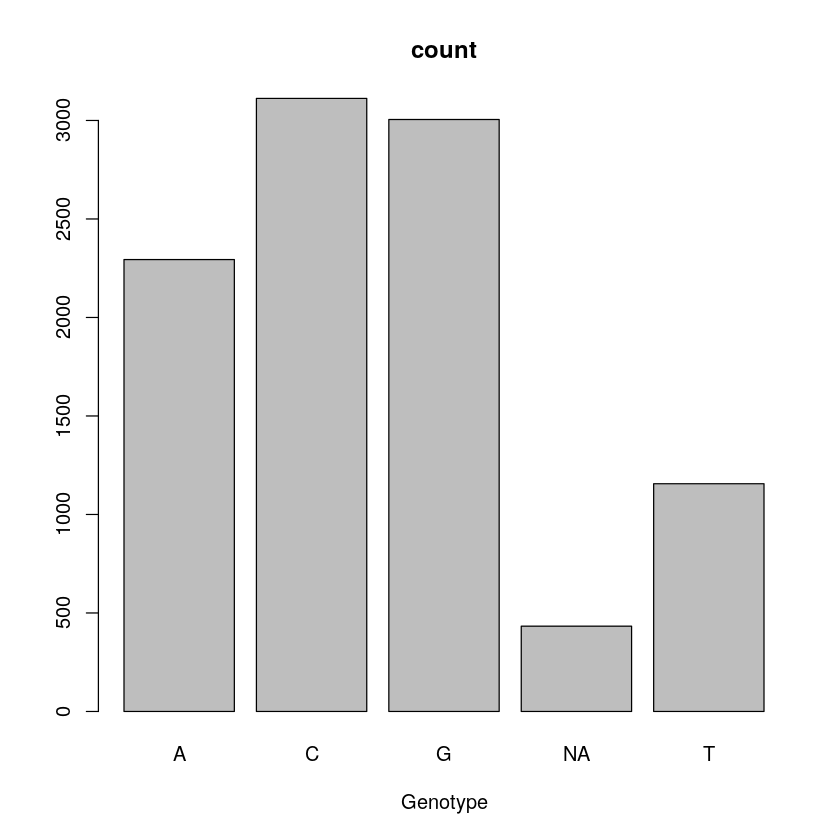

In [7]:
sql_query <- "SELECT genotype 
     FROM `jax-cube-prd-ctrl-01.mouse_snp.chr6_flat`
     limit 10000"
snp_data <- bq_table_download(
    bq_project_query(PROJECT_ID, query=sql_query)
)

counts <- table(snp_data$genotype)
barplot(counts, main="count", xlab="Genotype")